<a href="https://colab.research.google.com/github/wujinja-cgu/PyCaret-Anomaly-Detection/blob/main/a_story_about_unsupervised_learning%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 data-toggle="list"  role="tab" aria-controls="home"><p style="font-size : 30px"><font color="darkgrey">Content<font/></p></h3>

1. [<font color="darkgrey">Cross Section Data<font/>](#1)   
    - 1.1 [<font color="darkgrey">PCA (Principal Component Analysis)<font/>](#1.1)
    - 1.2 [<font color="darkgrey"> t-SNE (t-Distributed Stochastic Neighbor Embedding)<font/>](#1.2)
    - 1.3 [<font color="darkgrey"> UMAP (Uniform Manifold Approximation and Projection)<font/>](#1.3)
    - 1.4 [<font color="darkgrey"> TriMap (Triplets Manifold Approximation and Projection)<font/>](#1.4)
    - 1.5 [<font color="darkgrey"> PaCMAP (Pairwise Controlled Manifold Approximation Projection)<font/>](#1.5)
    - 1.6 [<font color="darkgrey"> Autoencoder<font/>](#1.6)
    - 1.7 [<font color="darkgrey"> Comparison<font/>](#1.7)
2. [<font color="darkgrey">Time Series Outliers<font/>](#5)
    - 2.1 [<font color="darkgrey">Visual Analysis<font/>](#5.1)
    - 2.2 [<font color="darkgrey"> PCA<font/>](#5.2)
    - 2.3 [<font color="darkgrey"> UMAP<font/>](#5.3)
    - 2.4 [<font color="darkgrey">Isolation Forest<font/>](#5.4)
    - 2.5 [<font color="darkgrey"> DBSCAN<font/>](#5.5)
    - 2.6 [<font color="darkgrey"> Autoencoder LSTM<font/>](#5.6)
    - 2.7 [<font color="darkgrey"> KDE (Kernel Density Estimator)<font/>](#5.7)
3. [<font color="darkgrey">Conclusion<font/>](#6)

In [1]:
import os
!pip install numba==0.50
import numpy as np
np.random.seed(123)

import pandas as pd
pd.set_option("display.max_rows", 1000)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest as ISOF
!pip install umap
import umap
import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity as kde

import keras as ks
import tensorflow as tf

from scipy import interpolate

!pip install trimap==1.0.14
import trimap

!pip install pacmap==0.4
import pacmap

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numba
  Running setup.py clean for numba
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for llvmlite
  Running setup.py clean for llvmlite
Failed to build numba llvmlite
ERROR: Could not build wheels for numba, llvmlite, which is required to install pyproject.toml-base

In [2]:
url='https://github.com/wujinja-cgu/PyCaret-Anomaly-Detection/releases/download/mydata_COVID-19_Autoenocder/mydata_COVID19.csv'
mydata = pd.read_csv(url)
mydata.head(10)

diff         V1        V2        V3        V4         V5        V6  \
0    Y   0.609287 -0.114708  1.873611  0.723241 -18.583570 -2.167496   
1    Y  12.001138  0.395941  1.253045  0.116624 -30.560545 -1.958997   
2    Y  43.223827  0.018741  3.222163  0.632186 -39.906130 -0.889479   
3    Y  36.498253 -0.837654  3.107058  1.460295 -47.252068 -1.670387   
4    Y  13.625356  0.039084  2.365281  0.896835 -13.611695 -0.392704   
5    Y  31.506899 -0.286971  2.781794  1.091773 -37.299183 -1.520670   
6    Y  32.978874 -0.280979  2.854572  1.085362 -37.761210 -1.483445   
7    Y  38.097810 -0.137707  2.857437  1.058756 -35.391304 -1.281926   
8    Y  31.820705 -0.518033  2.439496  0.551670 -10.146861 -0.395402   
9    Y  27.724415 -0.377751  2.785798  0.771994 -24.557144 -1.065880   

         V7        V8        V9  ...      V247      V248       V249      V250  \
0  0.943664 -1.583638  0.564760  ... -0.736174  1.419370  -2.984402  0.411443   
1  0.010296 -0.400378  0.224743  ... -0.565072  0.665200   3.489962  1.348775   
2 -1.529962 -0.696772  0.636895  ... -0.335383  1.399736   4.634891  1.420937   
3 -3.067684  0.346645  1.192981  ... -0.950800  1.806277  15.955308  1.618619   
4 -0.507420 -1.243848  0.813950  ...  0.060127  1.197377 -12.125166  0.396103   
5 -1.784558 -0.321445  0.750840  ... -0.736658  1.518667   6.501953  1.360406   
6 -1.831513 -0.327072  0.771838  ... -0.727077  1.530817   6.414480  1.406718   
7 -1.862218 -0.334572  0.776274  ... -0.749534  1.381527   7.109447  1.552898   
8 -0.952567 -0.482278  0.463081  ... -0.145635  0.911446   4.011349  0.698008   
9 -0.996842 -0.582116  0.492345  ... -0.402214  1.311906  -0.059896  1.095469   

       V251      V252      V253      V254      V255       V256  
0 -5.120366 -1.142536  1.722576 -1.629901 -0.049432 -14.588076  
1 -1.257218 -1.639898  1.189502 -2.011475 -0.391746 -22.910946  
2 -1.397370 -2.081937  0.077978 -1.362791 -0.329889  13.453539  
3 -3.546632 -3.851397 -0.495885 -1.965701 -0.570861  20.740270  
4 -0.442918 -0.583232 -0.076740  0.138185  0.330057  23.024880  
5 -0.459692 -2.490657 -0.059866 -1.547161 -0.461263   8.098164  
6 -0.483881 -2.499090 -0.084263 -1.554229 -0.450008   9.045090  
7 -0.570403 -2.367575 -0.103854 -1.527349 -0.349603   9.664654  
8 -1.250831 -1.132034 -0.067509 -0.711477 -0.037809   4.165742  
9  0.555703 -1.070132 -0.024490 -1.049766 -0.425218   9.665889  

[10 rows x 257 columns]

In [14]:
mydata = mydata.replace({'diff': {'Y': 1, 'N': 0}})
mydata.head(30)

diff         V1        V2        V3        V4         V5        V6  \
0      1   0.609287 -0.114708  1.873611  0.723241 -18.583570 -2.167496   
1      1  12.001138  0.395941  1.253045  0.116624 -30.560545 -1.958997   
2      1  43.223827  0.018741  3.222163  0.632186 -39.906130 -0.889479   
3      1  36.498253 -0.837654  3.107058  1.460295 -47.252068 -1.670387   
4      1  13.625356  0.039084  2.365281  0.896835 -13.611695 -0.392704   
5      1  31.506899 -0.286971  2.781794  1.091773 -37.299183 -1.520670   
6      1  32.978874 -0.280979  2.854572  1.085362 -37.761210 -1.483445   
7      1  38.097810 -0.137707  2.857437  1.058756 -35.391304 -1.281926   
8      1  31.820705 -0.518033  2.439496  0.551670 -10.146861 -0.395402   
9      1  27.724415 -0.377751  2.785798  0.771994 -24.557144 -1.065880   
10     1  27.724415 -0.377751  2.785798  0.771994 -24.557144 -1.065880   
11     1   2.964759 -0.591723  0.439854  0.681222   5.725063 -0.354841   
12     1  -7.977384 -0.145133  0.361772  0.049202 -53.668360 -2.333236   
13     1  45.108677  0.036588  3.215358  0.615262 -40.548557 -0.854011   
14     1  45.033703  0.039389  3.231308  0.610884 -40.727634 -0.860613   
15     1  46.224930 -0.007949  3.282933  0.578581 -41.352673 -0.870955   
16     1  45.872578  0.002275  3.281880  0.561168 -41.317455 -0.863740   
17     1  -0.176193 -0.583089  1.196858  1.069880 -18.880270 -1.508604   
18     1  45.187730  0.037345  3.268143  0.585851 -41.353940 -0.858039   
19     1  10.462560 -0.160200  2.263357  0.475777  -2.143302  0.082635   
20     1  47.151253  0.035726  3.285461  0.550926 -42.419968 -0.859477   
21     1  45.614150 -0.020246  3.274735  0.593732 -40.841900 -0.883704   
22     1  44.852150  0.032260  3.263062  0.585254 -41.330925 -0.863220   
23     1  45.047104  0.035389  3.225835  0.618484 -40.612125 -0.866734   
24     1   4.397770 -0.111032  1.463547  0.868083   2.601884 -0.475473   
25     1  42.362785  0.016000  3.239174  0.636938 -41.440670 -1.033595   
26     1  46.929752  0.007648  3.255402  0.593174 -41.664734 -0.881064   
27     1  46.244160 -0.007359  3.285045  0.577852 -41.379940 -0.870942   
28     1  22.781538 -0.609082  2.729808  1.028509 -66.568570 -0.770925   
29     1  45.083070  0.038982  3.233085  0.612136 -40.780670 -0.862080   

          V7        V8        V9  ...      V247      V248       V249  \
0   0.943664 -1.583638  0.564760  ... -0.736174  1.419370  -2.984402   
1   0.010296 -0.400378  0.224743  ... -0.565072  0.665200   3.489962   
2  -1.529962 -0.696772  0.636895  ... -0.335383  1.399736   4.634891   
3  -3.067684  0.346645  1.192981  ... -0.950800  1.806277  15.955308   
4  -0.507420 -1.243848  0.813950  ...  0.060127  1.197377 -12.125166   
5  -1.784558 -0.321445  0.750840  ... -0.736658  1.518667   6.501953   
6  -1.831513 -0.327072  0.771838  ... -0.727077  1.530817   6.414480   
7  -1.862218 -0.334572  0.776274  ... -0.749534  1.381527   7.109447   
8  -0.952567 -0.482278  0.463081  ... -0.145635  0.911446   4.011349   
9  -0.996842 -0.582116  0.492345  ... -0.402214  1.311906  -0.059896   
10 -0.996842 -0.582116  0.492345  ... -0.402214  1.311906  -0.059896   
11 -0.336834  0.008686  0.185838  ... -0.304118  0.279981  -1.108149   
12 -1.352535 -0.012447  1.505582  ...  0.382078  1.181668   0.006827   
13 -1.561072 -0.686821  0.642351  ... -0.331844  1.368802   5.454804   
14 -1.545033 -0.701653  0.636639  ... -0.327776  1.378484   5.366118   
15 -1.393808 -0.783005  0.605960  ... -0.303480  1.397210   5.506232   
16 -1.366588 -0.797929  0.587702  ... -0.289700  1.394363   5.394670   
17 -0.486415 -0.550223  0.691767  ... -0.569242  1.182139  -1.549990   
18 -1.493357 -0.746317  0.622974  ... -0.302444  1.398388   5.211880   
19 -1.349579 -0.535273  0.553845  ...  0.461920  1.045929  -4.621244   
20 -1.420153 -0.780775  0.595327  ... -0.293253  1.382962   6.015692   
21 -1.384164 -0.779768  0.608197  ... -0.313124  1.401858   5.272464   
22 -1.486758 -0.746198  0.622733  ... -0.299912  1.40


The following methods are either based on the optimization of variances (PCA) or use distances (PCA, t-SNE, UMAP, TriMap, PaCMAP, DBSCAN) or they are neural networks that use weights. All of them have in common that the data should be normalized before. We will not go into the different methods of normalization for the time being.

Why should distance-based methods be normalized? Well, suppose the scale of one variable (a) goes from 0 to 1 and that of another (b) goes from - 1000 to 1000. If we were to compute distance en between the observations of a and b, this would of course be determined almost exclusively by b. The same applies to the calculation of variances.

Neural networks, on the other hand, simply have difficulties with backpropagation when the scales are very different. If the inputs are of different scales, the weights of some inputs will be updated much faster than other ones.

In [3]:
def Normalization(DF, cols):
    DF=DF.copy()
    for c in cols:
        DF[f"{c}"] = ((DF["{}".format(c)]-DF["{0}".format(c)].mean()) / DF["{}".format(c)].std())

    return DF

In [4]:
Data = Normalization(DF=mydata, cols=mydata.drop(columns=["diff"]).columns)

<font size="+2" color="grey"><b>1.1 PCA (Principal Component Analysis) </b></font><br><a id="1.1"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

This method reframes the data into uncorrelated principal components by calculating an Eigendecomposition of the variance-covariance matrix of the features. Using the fact that

$$ Av = \lambda v $$
$$ v(A - \lambda I)=0 $$

where A is a symmetric matrix, λ is one of the possible Eigenvalues and v is the corresponding Eigenvector.Since there is a linear dependence due to the equality, the determinant cannot have a volume. Thus, the system is initially solvable for each eigenvalue. With these eigenvalues the eigenvectors can be created. It is to be paid attention to the fact that these must be normalized, since afterwards the following decomposition can be accomplished:

$$ A = VDV^{-1} $$

Where V is the matrix of normalized eigenvectors, D is a diagonal matrix with the eigenvalues in the main diagonal (of course in the same order as the v in V). The lambdas ordered by size give the order of the principal components. The larger the lambda, the greater the proportion of variance it contains. The vectors v contained in V are the weights of the features to obtain the rotation.

The resulting components are linear representations of the original data. The total variance (What is equated here with information content) of all components is exactly equal to the total variance of the entire data set. The first component contains the most variance. With each component, the variance decreases, so that a large part of the total variance is in the first components. We will find this out later in this story.

In [5]:
pca = PCA(n_components=mydata.shape[1]-1,random_state=1)
transformed = pca.fit_transform(mydata.drop(columns=["diff"]))

In [6]:
Reduced = pd.DataFrame(transformed)

In [7]:
def scatterPlot(x,y,df,color,colorName="diff", a=0.65, main_title=""):
    df=df.copy()
    df[f"{colorName}"]=color
    #plt.figure(figsize=(12,9))

    s=sns.JointGrid(
        x=x,
        y=y,
        data=df,
        hue=f"{colorName}",
        palette="viridis",
        height=10,
        ratio=5
        )
    s.plot_joint(sns.scatterplot, s=100, alpha=a)
    s.plot_marginals(sns.kdeplot, cut=0)
    s.fig.suptitle(main_title, fontsize=15)

    ax = plt.gca()
    #ax.set_title(main_title)

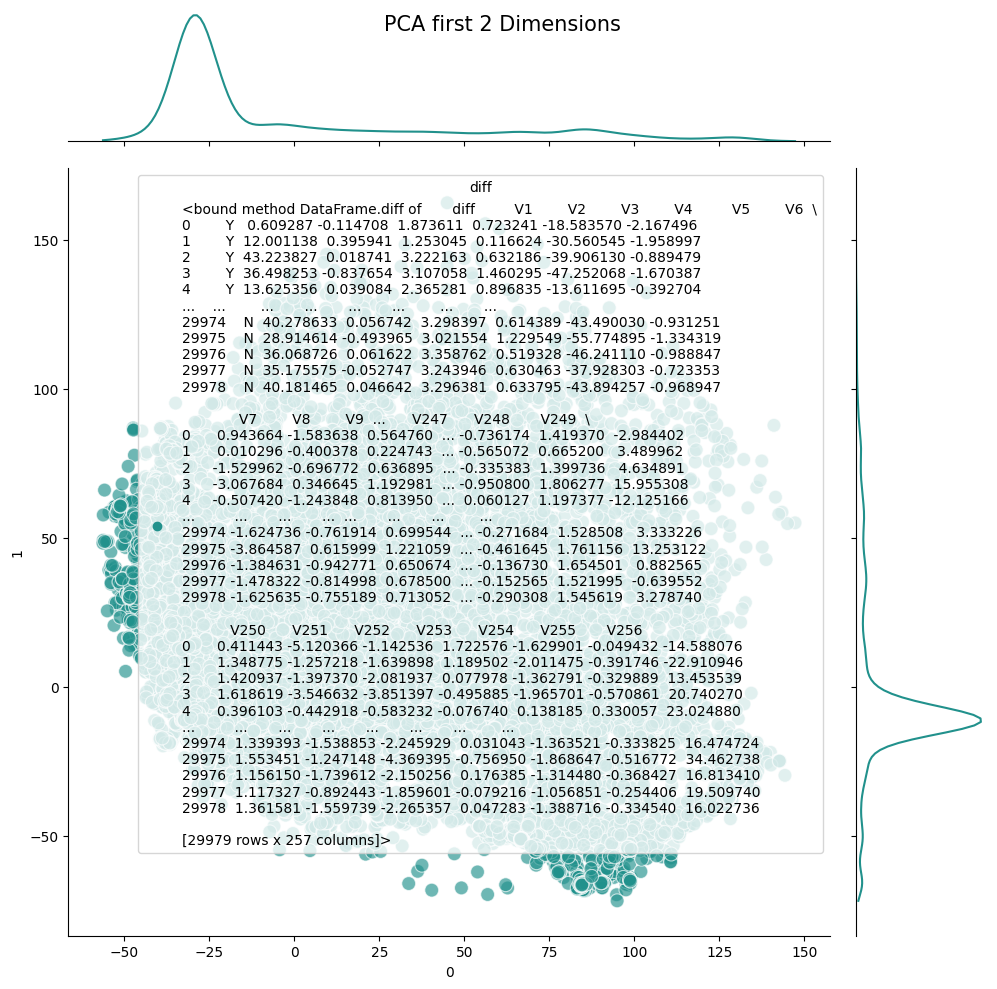

In [8]:
scatterPlot(x=0,y=1,df=Reduced,color=mydata.diff, main_title="PCA first 2 Dimensions")

In [9]:
def barPlot(y, threshold):
    fig, axs = plt.subplots(1,2, figsize=(20,6))
    #plt.figure(figsize=(12,9))
    heights1=y
    heights2=y.cumsum()
    colors=heights2 >= threshold

    axs[0].bar(height=heights1, x=range(1,len(y)+1), width=0.8, color=["black" if x == True else "maroon" for x in colors])
    axs[0].set_xticks(ticks=range(1,len(y)+1))
    axs[0].set_yticks(ticks=np.array(list(range(0,11)))/10)
    axs[0].set_title("Variance by Component", fontsize = 16)

    axs[1].bar(height=heights2, x=range(1,len(y)+1), width=0.8, color=["black" if x == True else "maroon" for x in colors])
    axs[1].axhline(y=threshold, xmin=0, xmax=3, c="black")
    axs[1].set_xticks(ticks=range(1,len(y)+1))
    axs[1].set_yticks(ticks=np.array(list(range(0,11)))/10)
    axs[1].set_title(
        "Cumul. Variance of " + str(sum(colors == False)+1) + " Components >= " + str(int(threshold*100)) + " %",
        fontsize=14
    )
    plt.show()

Let's take a look at the variance of the components individually as well as cumulatively.

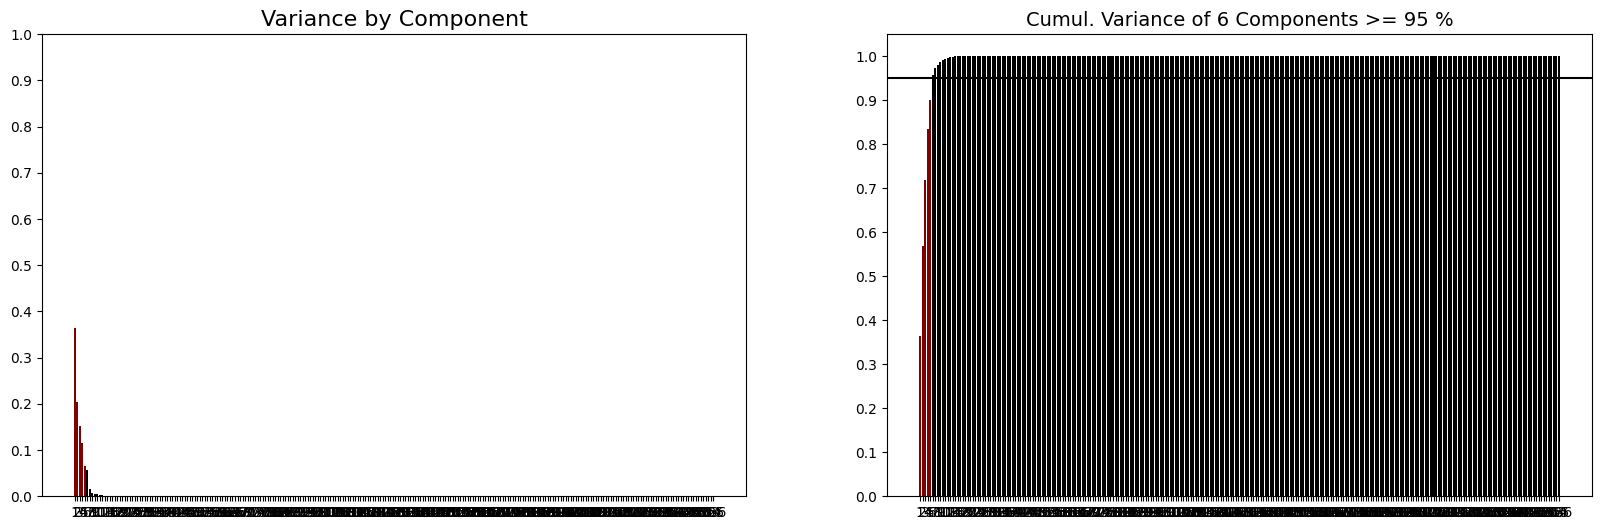

In [10]:
barPlot(y=pca.explained_variance_ratio_, threshold=0.95)

You can see that already with 7 components more than 90% of the variance is reached.

How much variance is contained in these two dimensions. Well, we could just look at the barplots and see the result. However, I promised to come back to the calculation of the variance. The variance of the original data set is, as we know, exactly the variance of all components. Thus, we only need to sum up.

In [11]:
def total_variance(DF, subDF):
    variance, subVariance = 0, 0

    for c in DF.drop(columns=["diff"]).columns:
        variance = variance + np.var(DF["{0}".format(c)])

    for s in range(len(subDF.columns)):
        subVariance = subVariance + np.var(subDF.iloc[:,s])

    result = "Variance left in reduced dimensions: " + str(round(subVariance / variance * 100, 1)) + " %"
    return result

In [12]:
total_variance(mydata, Reduced.iloc[:,[0,1]])

'Variance left in reduced dimensions: 56.8 %'

An interesting question would be which method provides the most information in the two dimensions. One could take the two dimensions and try to explain the original data set, dimension by dimension, with them. The better this works, the more information should be contained. But be careful, the correlations between the reduced dimensions and the original data set are not necessarily linear. Thus we have to take a method that takes this non-linearity into account. Here I chose a Gradient Boosting Regressor with default parameters, because it adapts very well also non-linear correlations. To assess how good the explanatory power is, the R-square score, and the maximum error are used.

In [15]:
def Comparison(DF, subDF):
    """this function fits a svr with the reduced data as predictors to each original column iteratively with a loop. \n
 regression target = original column \n predictors = all columns for the reduced dataset"""

    DF=DF.copy()
    subDF=subDF.copy()
    subDF.columns=[str(i) for i in subDF.columns]

    r2=[]
    mae=[]
    maxErr=[]
    model = GBR()

    for i in range(DF.shape[1]):
        model.fit(X=subDF, y=DF.iloc[:,i])
        pred = model.predict(X=subDF)
        #r2.append(model.score(X=subDF, y=DF.iloc[:,i]))
        r2.append(r2_score(y_true=DF.iloc[:,i], y_pred=pred))
        mae.append(mean_absolute_error(y_true=DF.iloc[:,i], y_pred=pred))
        maxErr.append(max_error(y_true=DF.iloc[:,i], y_pred=pred))


    return r2, mae, maxErr

In [16]:
pcar2, pcamae, pcamaxerr=Comparison(mydata, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.2 t-SNE (t-Distributed Stochastic Neighbor Embedding) </b></font><br><a id="1.2"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In this method, a gradient descent is used to project high-dimensional clusters onto low-dimensional space and, by shifting the individual observations, to recover the relative distance between two points that were close to each other in high-dimensional space. This, of course, means that the method tends to focus on local structures. An important difference to PCA is that the resulting components are not necessarily linear to the original data. Most important parameters are:

* perplexity (controls focus on local or global structure)
* no. of components

In [17]:
tSNE = TSNE(
    n_components=2,
    perplexity=60,
    init = 'random'
    )

transformed = tSNE.fit_transform(mydata.drop(columns=["diff"]))

In [18]:
Reduced = pd.DataFrame(transformed)

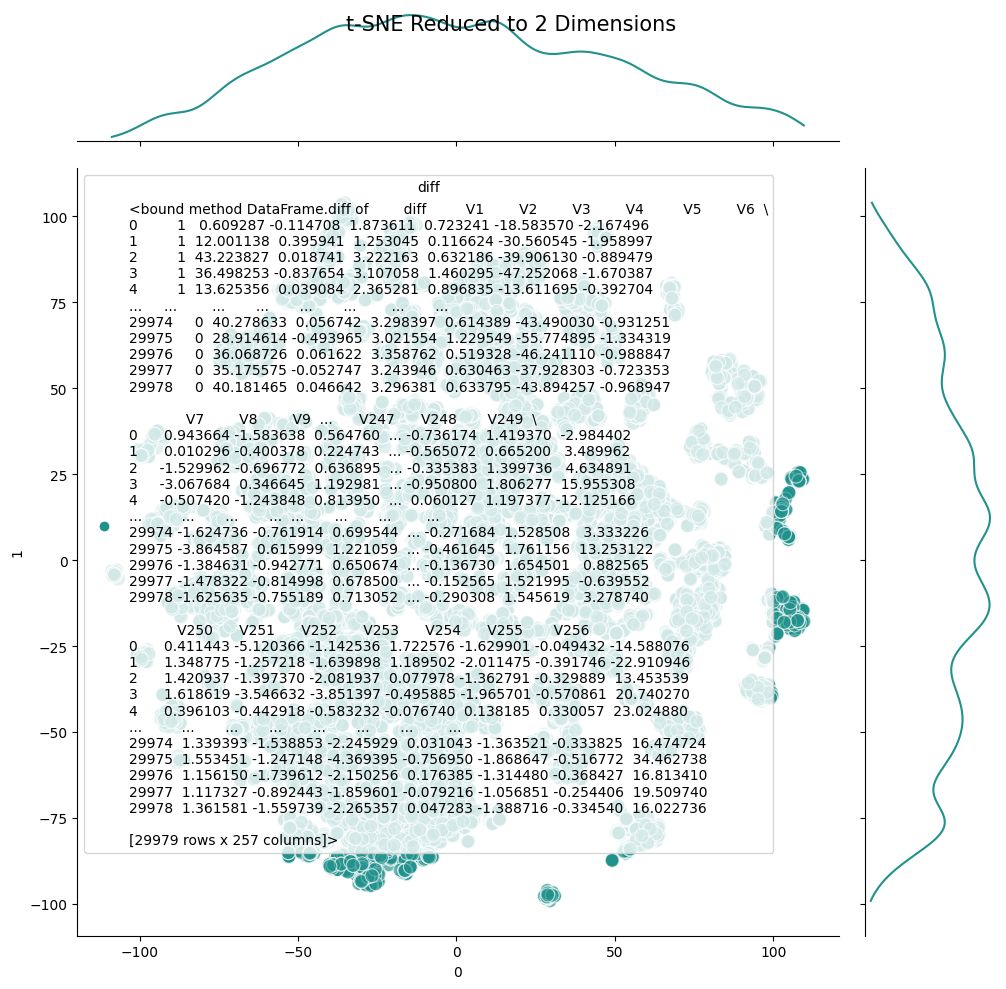

In [19]:
scatterPlot(x=0,y=1,df=Reduced,color=mydata.diff, main_title="t-SNE Reduced to 2 Dimensions")

In [20]:
tSNEr2, tSNEmae, tSNEmaxerr=Comparison(mydata, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.3 UMAP (Uniform Manifold Approximation and Projection) </b></font><br><a id="1.3"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

This method works basically similar to t-SNE. Here, too, the clusters of the high-dimensional space are tried to be restored in the low-dimensional space. However, a graph is constructed, which is to be regarded as a learned hypothesis. This leads to the fact that this hypothesis can be applied also to unseen observations. Overall, UMAP is faster than t-SNE and minimally better at reconstructing global structures. Most important parameters are:

* no. of neighbors (controls focus on local or global structure)
* minimum distance
* no. of components

In [22]:
!pip uninstall umap
!pip install umap-learn

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/umap/*
Proceed (Y/n)? y
  Successfully uninstalled umap-0.1.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=e6f6301e374c3baf92943c50c322ff594a1156208a8b6efe0912b4e3475ba1bf
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [25]:
!pip show umap-learn

Name: umap-learn
Version: 0.5.5
Summary: Uniform Manifold Approximation and Projection
Home-page: http://github.com/lmcinnes/umap
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numba, numpy, pynndescent, scikit-learn, scipy, tqdm
Required-by: 


In [26]:
!pip install --upgrade umap-learn

In [32]:
import umap.umap_ as UMAP
UMP = UMAP.UMAP(
    n_neighbors=20,
    min_dist=0.5,
    n_components=2,
    spread=3
    )

transformed = UMP.fit_transform(mydata.drop(columns=["diff"]))

In [34]:
Reduced = pd.DataFrame(transformed)

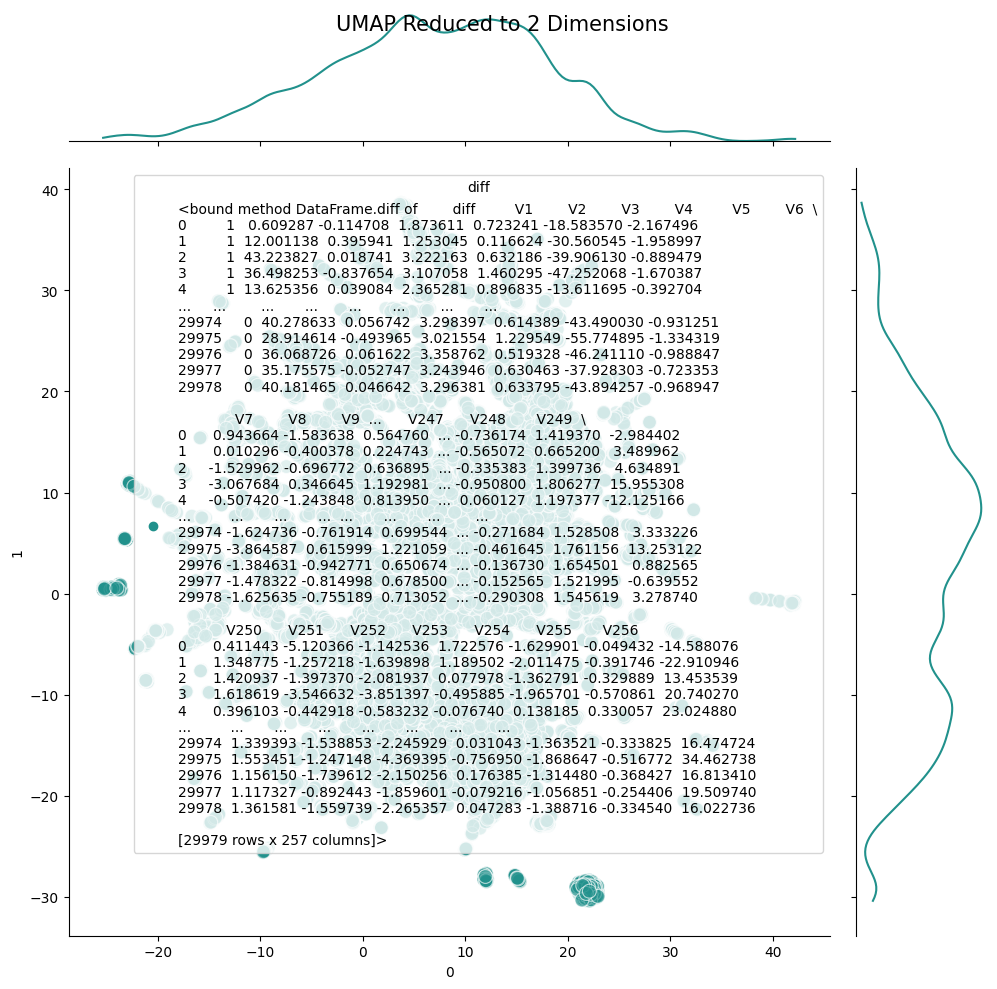

In [35]:
scatterPlot(x=0,y=1,df=Reduced,color=mydata.diff, main_title="UMAP Reduced to 2 Dimensions")

In [36]:
UMPr2, UMPmae, UMPmaxerr=Comparison(mydata, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.4 TriMap (Triplets Manifold Approximation and Projection) </b></font><br><a id="1.4"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

The algorithm attempts to compute an embedding that preserves the order of the
distances within a subset of triplets (set of three observations). This subset usually consists of a k-nearest neighbor and another
observation with respect to a focused observation, and random triplets
which consist of two nonneighbors. This method focuses on the area of local and global structure. Most important parameters are:

* n_inliers (Number of nearest neighbors for forming the nearest neighbor triplets)
* n_outliers (Number of outliers for forming the nearest neighbor triplets)
* n_random (Number of random triplets per point)

In [38]:
TriMap = trimap.TRIMAP(
    n_inliers=10,
    n_outliers=50,
    n_random=5,
    apply_pca=False,
    verbose=False
    )

transformed = TriMap.fit_transform(mydata.drop(columns=["diff"]).values)

In [39]:
Reduced = pd.DataFrame(transformed)

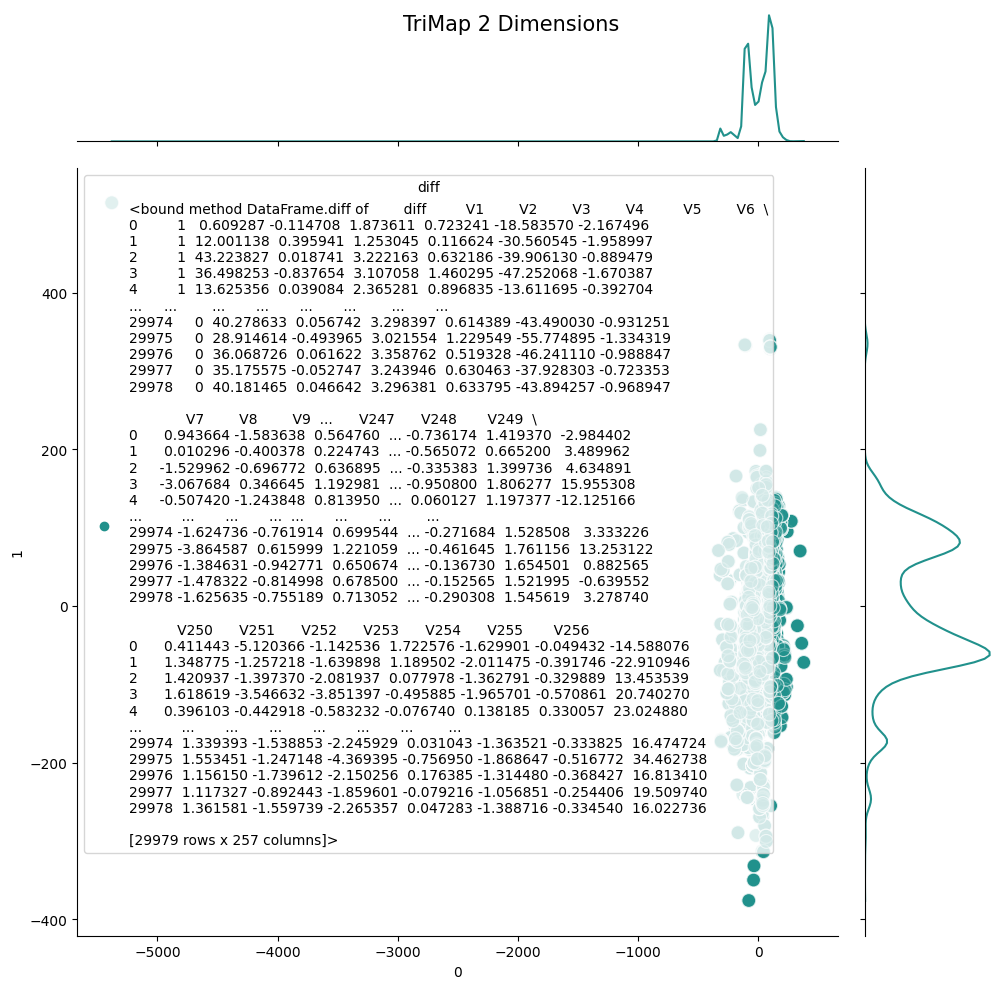

In [40]:
scatterPlot(x=0,y=1,df=Reduced,color = mydata.diff, main_title="TriMap 2 Dimensions")

In [41]:
TriMapr2, TriMapmae, TriMapmaxerr=Comparison(mydata, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.5 PaCMAP (Pairwise Controlled Manifold Approximation Projection) </b></font><br><a id="1.5"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

The Pairwise Controlled Manifold Approximation Projection (PaCMAP) preserves both local and global structure. To achieve this, the method uses a well defined foss function as well as a special graph optimization technique. Most important parameters:

* n_neighbors (number of neighbors considered in the k-Nearest Neighbor graph)
* MN_ratio (the ratio of the number of mid-near pairs to the number of neighbors)
* FP_ratio (the ratio of the number of further pairs to the number of neighbors)

In [42]:
PaCMP = pacmap.PaCMAP(
     n_dims=2,
     n_neighbors=5,
     MN_ratio=0.5,
     FP_ratio=2.0
    )

transformed = PaCMP.fit_transform(mydata.drop(columns=["diff"]).values)

In [43]:
Reduced = pd.DataFrame(transformed)

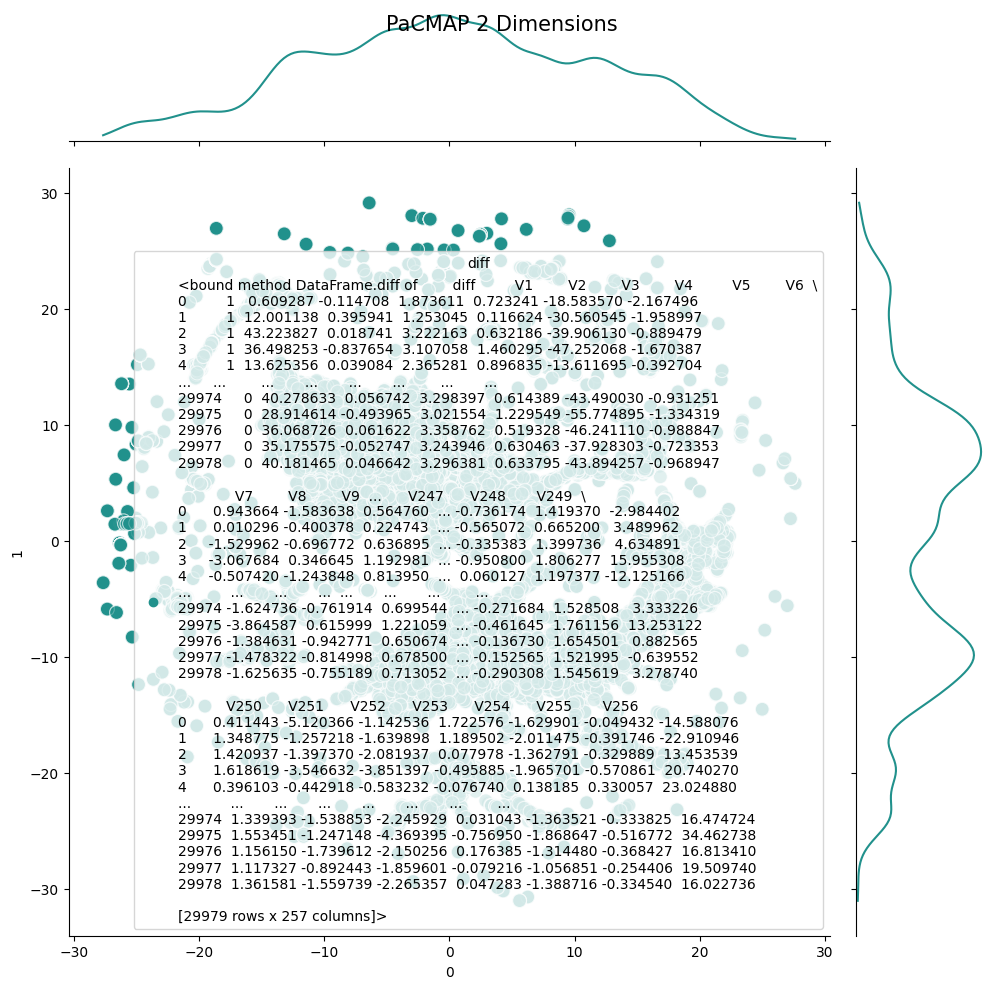

In [44]:
scatterPlot(x=0,y=1,df=Reduced,color=mydata.diff, main_title="PaCMAP 2 Dimensions")

In [46]:
PaCMAPr2, PaCMAPmae, PaCMAPmaxerr=Comparison(mydata, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.6 Autoencoder </b></font><br><a id="1.6"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

An autoencoder is a neural network that takes as input a data set and usually predicts it as a target. The autoencoder thus learns its own input. However, the input is compressed and reduced to a low-dimensional space (bottleneck). This is done by the encoder. Afterwards, the original data set is restored from the low-dimensional vectors via the decoder. The nice thing about this is that you can use metrics to check the quality of the autoencoder. If the autoencoder does a very good job of recreating the original dataset, much of the total information contained in the dataset should exist in the bottleneck.

In [47]:
np.random.seed(123)
tf.random.set_seed(123)

comp=2

INPUT = ks.layers.Input(shape=(mydata.drop(columns=["diff"]).shape[1]), name="EncoderInput")

#ENCO = ks.layers.BatchNormalization()(INPUT)
ENCO = ks.layers.Dense(32, activation='relu')(INPUT)

ENCO = ks.layers.Dropout(0.1)(ENCO)
ENCO = ks.layers.BatchNormalization()(ENCO)
ENCO = ks.layers.Dense(16, activation='relu')(ENCO)

ENCO = ks.layers.Dropout(0.1)(ENCO)
ENCO = ks.layers.BatchNormalization()(ENCO)
ENCO = ks.layers.Dense(comp, activation='linear', name="compresseion")(ENCO)

ENC = ks.Model(inputs=INPUT, outputs=ENCO)

DECO = ks.layers.BatchNormalization()(ENCO)
DECO = ks.layers.Dense(16, activation='relu')(DECO)

DECO = ks.layers.Dropout(0.1)(DECO)
DECO = ks.layers.BatchNormalization()(DECO)
DECO = ks.layers.Dense(32, activation='relu')(DECO)

DECO = ks.layers.Dropout(0.1)(DECO)
DECO = ks.layers.BatchNormalization()(DECO)
DECO = ks.layers.Dense(mydata.drop(columns=["diff"]).shape[1], activation='linear')(DECO)

AE = ks.Model(inputs=INPUT, outputs=DECO)

So this is the structure of the autoencoder.

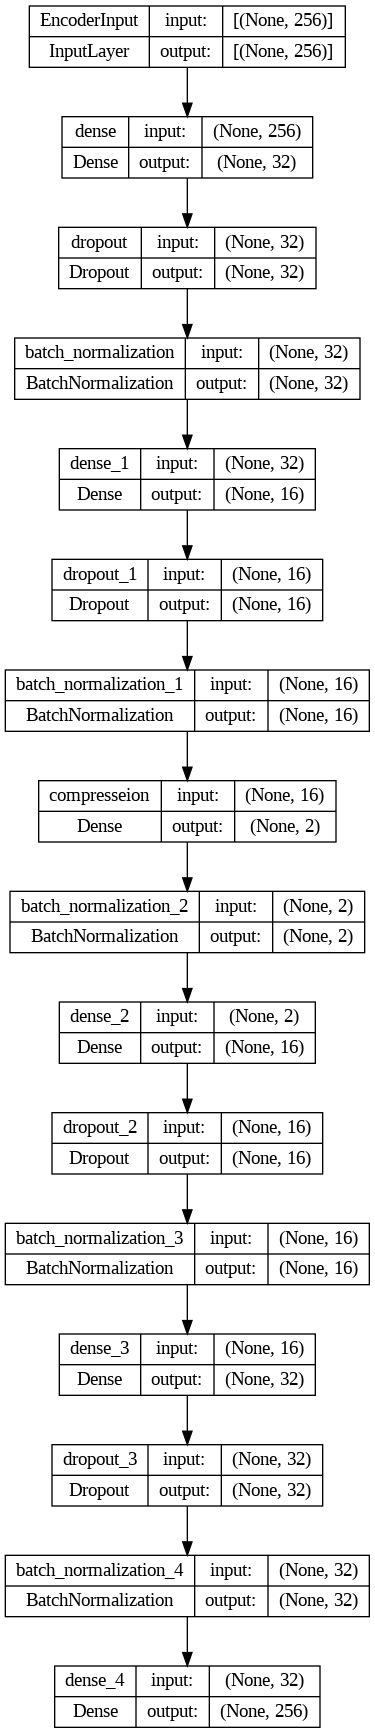

In [48]:
ks.utils.plot_model(
    AE,
    show_shapes=True,
    show_layer_names=True
    )

In [50]:
def rmse(y_pred, y_true):
    y_pred = tf.cast(y_pred, dtype="float32")
    y_true = tf.cast(y_true, dtype="float32")
    r = tf.sqrt(tf.keras.backend.mean(tf.square(y_pred - y_true)))
    return r

In [51]:
stop = ks.callbacks.EarlyStopping(
    monitor='mae',
    min_delta=0.000001,
    patience=100,
    mode='max'
    )

lrReducer = ks.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.000001,
    )

I have found that large initial learning rates and large batch sizes lead to significantly better results.

In [52]:
eps=1500
bs=1600
leRa=0.1
dec = 0.0000

"Learning rate and decay ok?: " + str(leRa - dec * eps > 0)

'Learning rate and decay ok?: True'

In [55]:
optimizer = ks.optimizers.Adamax(learning_rate=leRa)
AE.compile(optimizer = optimizer, loss = rmse, metrics = ["mae"])

I wonder what low-dimensional space would look like if we just used the untrained encoder. Let's just give it a try.

In [56]:
Reduced = ENC.predict(
   x=mydata.drop(columns=["diff"]),
   workers = 1,
   use_multiprocessing = True
)

Reduced = pd.DataFrame(Reduced)

937/937 [==============================] - 4s 4ms/step


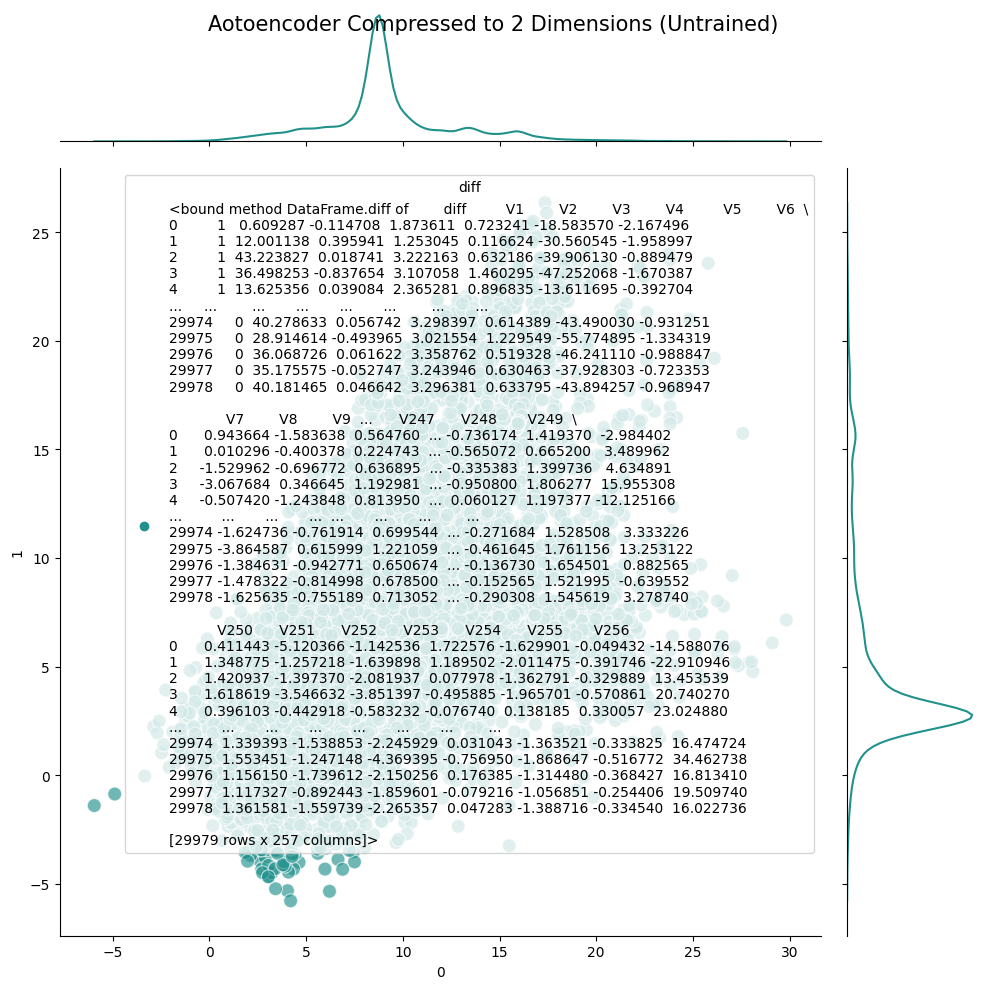

In [57]:
scatterPlot(x=0,y=1,df=Reduced,color=mydata.diff, main_title="Aotoencoder Compressed to " + str(comp) + " Dimensions (Untrained)")

Lets train the autoencoder.

In [58]:
history = ks.callbacks.History()

AE.fit(
    x=mydata.drop(columns=["diff"]),
    y=mydata.drop(columns=["diff"]),
    epochs = eps,
    batch_size = bs,
    shuffle = False,
    callbacks=[history, lrReducer],
    verbose=0
    )

print(AE.evaluate(mydata.drop(columns=["diff"]), mydata.drop(columns=["diff"])))

#print(history.history)

937/937 [==============================] - 4s 4ms/step - loss: 2.1339 - mae: 0.8742
[2.1339194774627686, 0.8742231726646423]


Let's see if the original image has changed. Note, we have set a seed.

In [59]:
Reduced = ENC.predict(
   x=mydata.drop(columns=["diff"]),
   workers = 1,
   use_multiprocessing = True
)

Reduced = pd.DataFrame(Reduced)

937/937 [==============================] - 3s 3ms/step


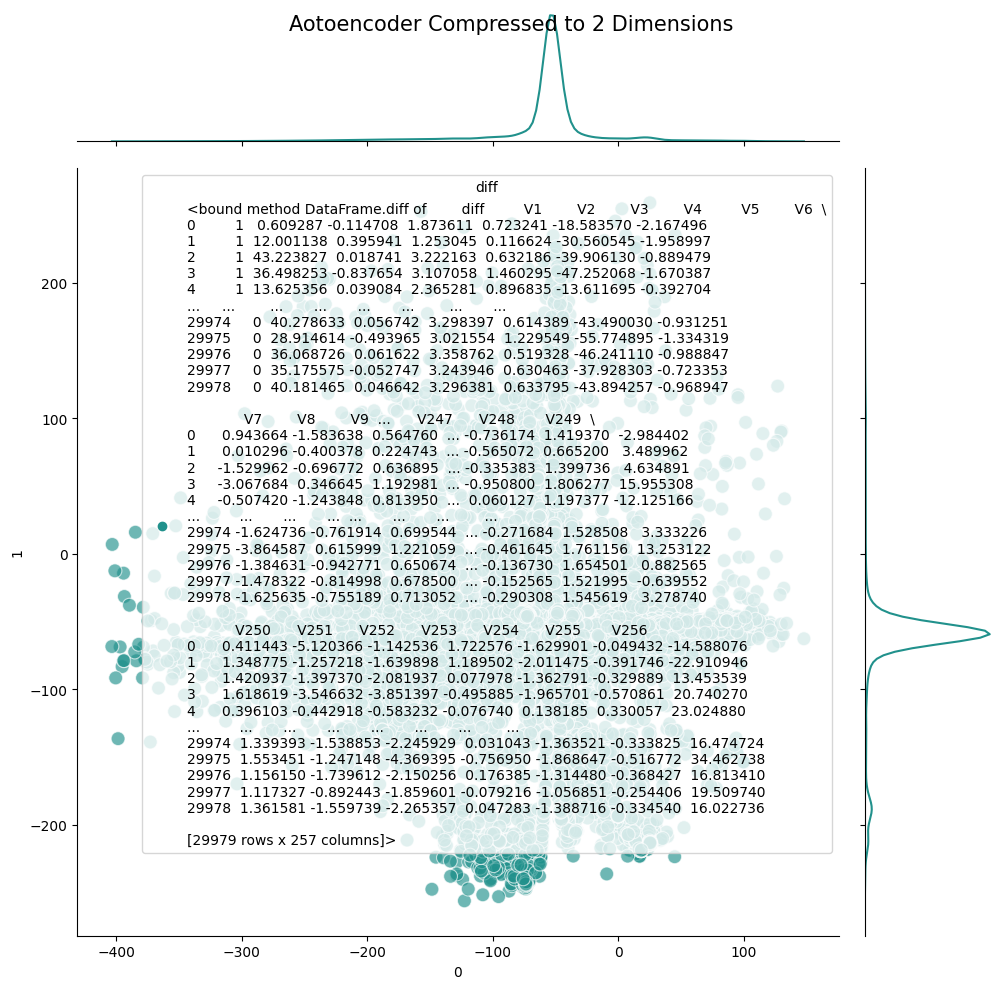

In [60]:
scatterPlot(x=0,y=1,df=Reduced,color=mydata.diff, main_title="Aotoencoder Compressed to " + str(comp) + " Dimensions")

In [61]:
autoEncr2, autoEncmae, autoEncmaxerr=Comparison(mydata, Reduced.iloc[:,[0,1]])

<font size="+2" color="grey"><b>1.7 Comparison </b></font><br><a id="1.7"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

Now comes the comparison, where we simply try to explain each variable in the data set with the two dimensions. The distribution of the RSquares is shown.

> Note that the coefficient of determination R squared measures linear correlations, but between the target (here, the respective feature of the data set) and the model output. Even though the relationships between the reduced dimensions of the methods and the original data set need not be linear.

In [62]:
def compare(dfList, method_names, title="Comparison R² Score"):

    fig, ax = plt.subplots(figsize=(16,9))
    ax.set_title(title)

    custom_lines = [
        plt.Line2D([0], [0], color="#20A387FF", lw=3),
        plt.Line2D([0], [0], color="#440154FF", lw=3)
        ]

    ax.legend(custom_lines, ['Median', 'Mean'])

    violin_parts = ax.violinplot(
        dfList,
        showmeans =True,
        vert=True,
        widths=0.75,
        showmedians=True,
        showextrema=False
        )

    plt.xticks(range(1,len(method_names)+1), method_names)

    for pc in violin_parts['bodies']:
        pc.set_facecolor('#3CBB75FF')
        pc.set_edgecolor('#404788FF')
        pc.set_linewidth(2)
        pc.set_alpha(0.3)

    for partname in ('cmedians', 'cmeans'):
        vp = violin_parts[partname]
        if partname == 'cmedians':
            vp.set_edgecolor('#20A387FF')
            vp.set_linewidth(3)
        else:
            vp.set_edgecolor('#440154FF')
            vp.set_linewidth(3)

    plt.show()

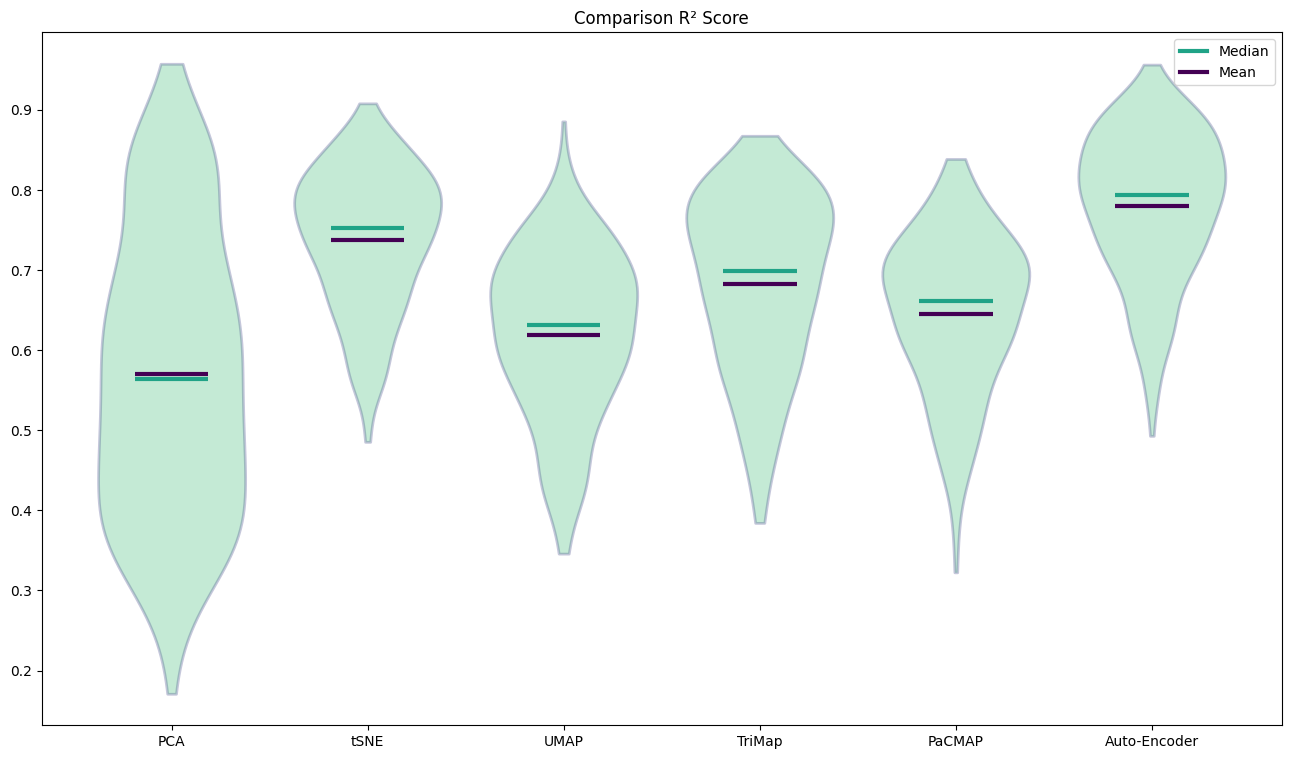

In [63]:
mNames=['PCA', 'tSNE', 'UMAP', 'TriMap', 'PaCMAP', 'Auto-Encoder']

comDF=[pcar2, tSNEr2, UMPr2, TriMapr2, PaCMAPr2, autoEncr2]
compare(comDF, mNames)

In [ ]:
#comDF=[pcamae, tSNEmae, UMPmae, TriMapmae, PaCMAPmae, autoEncmae]
#compare(comDF, mNames, title="Comparison MAE Score")

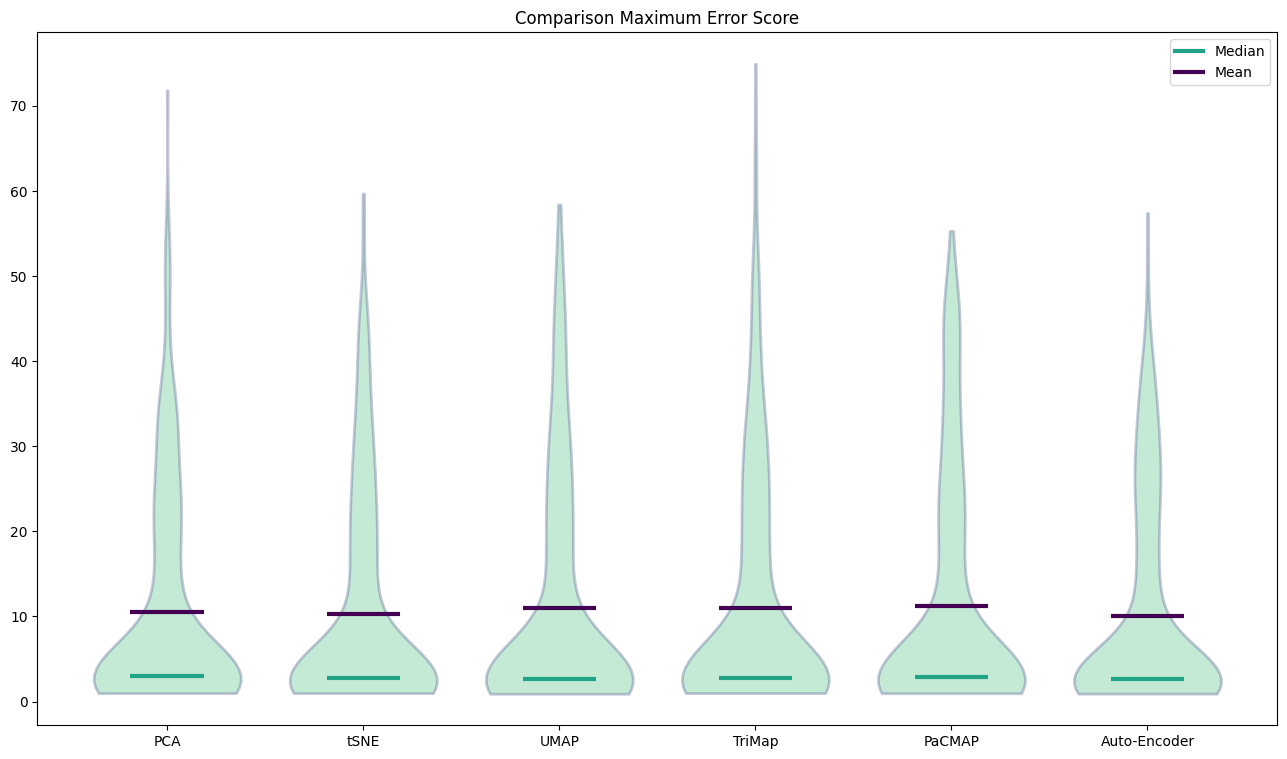

In [64]:
comDF=[pcamaxerr, tSNEmaxerr, UMPmaxerr, TriMapmaxerr, PaCMAPmaxerr, autoEncmaxerr]
compare(comDF, mNames, title="Comparison Maximum Error Score")

Based on the R-Square t-SNE, PaCMAP and TriMap take the most information in two dimensions. This is closely followed by UMAP and Autoencoders. PCA brings the lowest explanatory power. Probably because the observed correlations are not linear.

Based on the maximum error, PaCMAP and TriMap show the most robust results followed by Autoencoders and UMAP. t-SNE and PCA bring up the rear.

<font size="+3" color="grey"><b>5. Time Series Outliers </b></font><br><a id="5"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

Time series are a special case, as they are often non-stationary and often only a time series is available without further explanatory variables. I decided here to use a rather difficult dataset, the [Numenta Anomaly Benchmark](https://www.kaggle.com/boltzmannbrain/nab) dataset provided by [boltzmannbrain](https://www.kaggle.com/boltzmannbrain).

![](https://numenta.com/wp-content/uploads/2019/03/heartbeat@2x-1024x341.png)

In [ ]:
train = pd.read_csv("../input/nab/artificialNoAnomaly/artificialNoAnomaly/art_daily_small_noise.csv")
train =  Normalization(train, ["value"])
train["timestamp"] = train.timestamp.astype("datetime64")

test1 = pd.read_csv("../input/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsdown.csv")
test1 =  Normalization(test1, ["value"])
test1["timestamp"] = test1.timestamp.astype("datetime64")

test2 = pd.read_csv("../input/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsup.csv")
test2 =  Normalization(test2, ["value"])
test2["timestamp"] = test2.timestamp.astype("datetime64")

It is important in feature engineering not to include transient data such as time or year. These do not repeat when they have expired.

In [ ]:
def FeatEng(DF):

    DF=DF.copy()

    DF["weekday"] = DF.timestamp.dt.weekday
    DF["hour"] = DF.timestamp.dt.hour
    DF["minute"] = DF.timestamp.dt.minute
    DF["second"] = DF.timestamp.dt.second

    m=DF.value.mean()
    mx=m+DF.value.std()
    mi=m-DF.value.std()

    DF["mean20"] = DF.value.rolling(window=20).mean().fillna(m)
    DF["mean600"] = DF.value.rolling(window=600).mean()#.fillna(m)
    DF["max"] = DF.value.rolling(window=10).max().fillna(mx)
    DF["min"] = DF.value.rolling(window=10).min().fillna(mi)

    DF["lag1"] = DF.value.shift(periods=1, fill_value=m)
    DF["lag20"] = DF.value.shift(periods=20, fill_value=m)
    DF["lag30"] = DF.value.shift(periods=30, fill_value=m)
    DF["lag100"] = DF.value.shift(periods=100, fill_value=m)
    DF["lag200"] = DF.value.shift(periods=200, fill_value=m)
    DF["lag300"] = DF.value.shift(periods=300, fill_value=m)

    DF.dropna(inplace=True)

    return DF

In [ ]:
train = FeatEng(train)
test1 = FeatEng(test1)
test2 = FeatEng(test2)

time = test1.timestamp

First, let's take a look at the training dataset and the two test datasets

In [ ]:
pltDf = pd.concat([train[["timestamp", "value"]], test1[["timestamp", "value"]], test2[["timestamp", "value"]]]).reset_index(drop=True)

l = train.shape[0]*["train"]
l.extend(train.shape[0]*["test1"])
l.extend(train.shape[0]*["test2"])

pltDf["sample"] = l

plot = px.line(
    pltDf,
    x="timestamp",
    y="value",
    color = "sample",
    color_discrete_sequence=px.colors.qualitative.G10,
    template="simple_white"
    )

plot.add_vrect(
    x0="2014-04-11 08:00",
    x1="2014-04-11 20:50",
    annotation_text="outlier area",
    annotation_position="top left",
    fillcolor="grey",
    opacity=0.25,
    line_width=0
    )

plot

<font size="+2" color="grey"><b>5.1 PCA </b></font><br><a id="5.1"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [ ]:
pca = PCA(n_components=train.shape[1]-1,
          random_state=1
          )

pca.fit(train.drop(columns=["timestamp"]))
transformed1 = pca.transform(test1.drop(columns=["timestamp"]))
transformed2 = pca.transform(test2.drop(columns=["timestamp"]))
Reduced_PCA1 = pd.DataFrame(transformed1)
Reduced_PCA2 = pd.DataFrame(transformed2)

In [ ]:
barPlot(y=pca.explained_variance_ratio_, threshold=0.9)

One needs just two components co capture more than 90% of the variance of the data. No surprise, it originally consists of only one time series.

In [ ]:
scatterPlot(x=0,
            y=1,
            df=Reduced_PCA1,
            color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
            colorName="outlier",
            main_title="Test1: PCA Time Series reduced to 2 Dimernsions",
            a=0.8
            )

In [ ]:
scatterPlot(x=0,
            y=1,
            df=Reduced_PCA2,
            color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
            colorName="outlier",
            main_title="Test2: PCA Time Series reduced to 2 Dimernsions",
            a=0.8
            )

<font size="+2" color="grey"><b>5.2 UMAP </b></font><br><a id="5.2"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [ ]:
UMP = umap.UMAP(
    n_neighbors=20,
    min_dist=0.5,
    n_components=2,
    spread=3
    )

UMP.fit(train.drop(columns=["timestamp"]))

transformed1 = UMP.transform(test1.drop(columns=["timestamp"]))
transformed2 = UMP.transform(test2.drop(columns=["timestamp"]))
Reduced1 = (pd.DataFrame(transformed1))
Reduced2 = (pd.DataFrame(transformed2))

In [ ]:
scatterPlot(x=0,
            y=1,
            df=Reduced1,
            color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
            colorName="outlier",
            main_title="Test1: UMAP Time Series reduced to 2 Dimernsions",
            a=0.8
            )

In [ ]:
scatterPlot(x=0,
            y=1,
            df=Reduced2,
            color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
            colorName="outlier",
            main_title="Test2: UMAP Time Series reduced to 2 Dimernsions",
            a=0.8
            )

<font size="+2" color="grey"><b>5.3 Isolation Forest </b></font><br><a id="5.3"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In the isolation forest we train two different variants with different randomized feature selections.

In [ ]:
isoForest=ISOF(
    random_state=0,
    n_estimators=200,
    max_features=0.5
    )

isoForest.fit(train.drop(columns=["timestamp"]))
dFunc1 = isoForest.decision_function(test1.drop(columns=["timestamp"]))

isoForest=ISOF(
    random_state=0,
    n_estimators=200,
    max_features=0.1
    )

isoForest.fit(train.drop(columns=["timestamp"]))

dFunc2 = isoForest.decision_function(test2.drop(columns=["timestamp"]))

<font size="+2" color="grey"><b>5.4 DBSCAN </b></font><br><a id="5.4"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [ ]:
cluster = DBSCAN(eps=3.5, min_samples=25)
cluster.fit(test1.drop(columns=["timestamp"]))
clustLabs1 = cluster.labels_
cluster.fit(test1.drop(columns=["timestamp"]))
clustLabs2 = cluster.labels_

For the isolation forest it was very easy to find the cutoff. This is done by simply coloring the time series as a scatterplot with all possible path depths (given by the decision function). For DBSCAN it was also easy. But here we had to experiment a little with the sphere size and the number of neighbors.

For UMAP and PCA, no meaningful cutoff has been found by which outliers can be separated from the regular observations. Therefore, so that you can get an idea, I have colored the time series here with the value of the reduced dimension.

In [ ]:
test1["PCA"] = Reduced_PCA1[0].values
test1["iso"] = ["yes" if i < -0.115 else "no" for i in dFunc1]
test1["umap"] = Reduced1[0].values
test1["DBSCAN"] = ["yes" if i == -1 else "no" for i in clustLabs1]

test2["PCA"] = Reduced_PCA2[0].values
test2["iso"] = ["yes" if i < -0.08 else "no" for i in dFunc2]
test2["umap"] = Reduced2[0].values
test2["DBSCAN"] = ["yes" if i == -1 else "no" for i in clustLabs2]

<font size="+2" color="grey"><b>5.5 Time Series Results </b></font><br><a id="5.5"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

In [ ]:
plotP1 = px.scatter(
    test1,
    color="PCA",
    x="timestamp",
    y="value",
    title="PCA test1",
    marginal_y="histogram",
    template="simple_white"
    )

plotP1.add_vrect(
    x0="2014-04-11 08:00",
    x1="2014-04-11 20:50",
    annotation_text="outlier area",
    annotation_position="top left",
    fillcolor="grey",
    opacity=0.25,
    line_width=0
    )

plotP1

In [ ]:
plotP2 = px.scatter(
    test2,
    color="PCA",
    x="timestamp",
    y="value",
    title="PCA test2",
    marginal_y="histogram",
    template="simple_white"
    )

plotP2.add_vrect(
    x0="2014-04-11 08:00",
    x1="2014-04-11 20:50",
    annotation_text="outlier area",
    annotation_position="top left",
    fillcolor="grey",
    opacity=0.25,
    line_width=0
    )

plotP2

In [ ]:
plotU1 = px.scatter(
    test1,
    color="umap",
    x="timestamp",
    y="value",
    title="UMAP test1",
    marginal_y="histogram",
    template="simple_white"
    )

plotU1.add_vrect(
    x0="2014-04-11 08:00",
    x1="2014-04-11 20:50",
    annotation_text="outlier area",
    annotation_position="top left",
    fillcolor="grey",
    opacity=0.25,
    line_width=0
    )

plotU1

In [ ]:
plotU2 = px.scatter(
    test2,
    color="umap",
    x="timestamp",
    y="value",
    title="UMAP test2",
    marginal_y="histogram",
    template="simple_white"
    )

plotU2.add_vrect(
    x0="2014-04-11 08:00",
    x1="2014-04-11 20:50",
    annotation_text="outlier area",
    annotation_position="top left",
    fillcolor="grey",
    opacity=0.25,
    line_width=0
    )

plotU2

In [ ]:
plotI1 = px.scatter(
    test1,
    color="iso",
    x="timestamp",
    y="value",
    title="Isolation Forest test 1",
    marginal_y="histogram",
    template="simple_white",
    color_discrete_sequence=["green", "red"]
    )

plotI1.add_vrect(
    x0="2014-04-11 08:00",
    x1="2014-04-11 20:50",
    annotation_text="outlier area",
    annotation_position="top left",
    fillcolor="grey",
    opacity=0.25,
    line_width=0
    )

plotI1

In [ ]:
plotI2 = px.scatter(
    test2,
    color="iso",
    x="timestamp",
    y="value",
    title="Isolation Forest test 2",
    marginal_y="histogram",
    template="simple_white",
    color_discrete_sequence=["green", "red"]
    )

plotI2.add_vrect(
    x0="2014-04-11 08:00",
    x1="2014-04-11 20:50",
    annotation_text="outlier area",
    annotation_position="top left",
    fillcolor="grey",
    opacity=0.25,
    line_width=0
    )

plotI2

In [ ]:
plotD1 = px.scatter(
    test1,
    color="DBSCAN",
    x="timestamp",
    y="value",
    title="DBSCAN test 1",
    marginal_y="histogram",
    template="simple_white",
    color_discrete_sequence=["green", "red"]
    )

plotD1.add_vrect(
    x0="2014-04-11 08:00",
    x1="2014-04-11 20:50",
    annotation_text="outlier area",
    annotation_position="top left",
    fillcolor="grey",
    opacity=0.25,
    line_width=0
    )

plotD1

In [ ]:
plotD2 = px.scatter(
    test2,
    color="DBSCAN",
    x="timestamp",
    y="value",
    title="DBSCAN test 2",
    marginal_y="histogram",
    template="simple_white",
    color_discrete_sequence=["green", "red"]
    )

plotD2.add_vrect(
    x0="2014-04-11 08:00",
    x1="2014-04-11 20:50",
    annotation_text="outlier area",
    annotation_position="top left",
    fillcolor="grey",
    opacity=0.25,
    line_width=0
    )

plotD2

<font size="+2" color="grey"><b>5.6 Autoencoder LSTM </b></font><br><a id="5.6"></a>
<a href="#top" class="btn-xs btn-danger" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go back to the TOP</a>

One idea is of course to use an autoencoder for time series. LSTM is a natural choice for this.

A LSTM is a neural net, which sequentially loops after each observation. This means that the observations are equipped with a forgetting structure, similar to exponential smoothing. First, an observation is passed through the neural net. From the second observation on, the weighting of the first observation is still there. Therefore, it is first decided which part of the so-called cell state should be forgotten. Then it is seen which part of the new observation should be added to the cell state before the process is repeated. One can say that the cell state is the long term memory and the hidden state is the short term memory, as in simple RNNs.


First we have to reshape the dataset into the structure [samples, timesteps, features]

In [ ]:
train = train.reset_index(drop=True).loc[3:,:]
test1 = test1.reset_index(drop=True).loc[3:,:]
test2 = test2.reset_index(drop=True).loc[3:,:]
train.shape

In [ ]:
test1.drop(columns=["iso", "umap", "PCA", "DBSCAN"], inplace=True)
test2.drop(columns=["iso", "umap", "PCA", "DBSCAN"], inplace=True)
dropCols = ["timestamp"]
#dropCols.extend([i for i in train.columns if "lag" in i])
#dropCols.extend([i for i in train.columns if "mean" in i])
#dropCols.extend(["hour", "weekday", "minute", "second"])

y = train["value"].values.reshape((-1, 10, 1))

train = train.drop(columns=dropCols).to_numpy()
train = train.reshape((-1, 10, train.shape[1]))# samples, timesteps, features

time = test1.timestamp
test1 = test1.drop(columns=dropCols).to_numpy()
test1 = test1.reshape((-1, 10, test1.shape[1]))

test2 = test2.drop(columns=dropCols).to_numpy()
test2 = test2.reshape((-1, 10, test2.shape[1]))

This special autoencoder uses all features, but learns only the time series, using two dimensions as encoder. It is therefore not a classic autoencoder. However, this variant works better for the reconstruction of the time series.

In [ ]:
np.random.seed(123)
tf.random.set_seed(12)

comp=2

INPUT = ks.layers.Input(shape=(train.shape[1], train.shape[2]), name="EncoderInput")

ENCO = ks.layers.LSTM(
    32,
    activation='relu',
    return_sequences = True,
    stateful=False,
    dropout=0.2)(INPUT)

ENCO = ks.layers.LSTM(
    comp,
    activation = "relu",
    return_sequences = True,
    stateful=False,
    name = "compression")(ENCO)

ENC = ks.Model(inputs=INPUT, outputs=ENCO)

DECO = ks.layers.Dense(1)(ENCO)

AE = ks.Model(inputs=INPUT, outputs=DECO)


So this is the structure of the autoencoder.

In [ ]:
ks.utils.plot_model(
    AE,
    show_shapes=True,
    show_layer_names=True
    )

In [ ]:
lrReducer = ks.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.000001,
    )

In [ ]:
leRa=0.01
dec=0.00000
eps=2500
print("Learningrate ok: " + str(leRa - dec * 200 >= 0))
bs=train.shape[0]*10

optimizer = ks.optimizers.Adamax(lr=leRa, decay=dec, clipvalue=10)
AE.compile(optimizer = optimizer, loss = 'mae')

history = ks.callbacks.History()

AE.fit(
    x=train,
    y=y,
    epochs = eps,
    batch_size = bs,
    shuffle = False,
    callbacks=[history, lrReducer],
    verbose=0
    )

print(AE.evaluate(train, y))

Encoded1 = AE.predict(
   x=test1,
   workers = 1,
   use_multiprocessing = True
)

Encoded2 = AE.predict(
   x=test2,
   workers = 1,
   use_multiprocessing = True
)

Encoded1 = pd.DataFrame(np.reshape(Encoded1, (3430, y.shape[2])))
Encoded2 = pd.DataFrame(np.reshape(Encoded2, (3430, y.shape[2])))

ReducedTRAIN = ENC.predict(
   x=train,
   workers = 1,
   use_multiprocessing = True
)

ReducedTRAIN = pd.DataFrame(np.reshape(ReducedTRAIN, (3430, comp)))

Reduced1 = ENC.predict(
   x=test1,
   workers = 1,
   use_multiprocessing = True
)

Reduced2 = ENC.predict(
   x=test2,
   workers = 1,
   use_multiprocessing = True
)

Reduced1 = pd.DataFrame(np.reshape(Reduced1, (3430, comp)))
Reduced2 = pd.DataFrame(np.reshape(Reduced2, (3430, comp)))

In [ ]:
def reshapeAdd(DF, t, tr, reduced, encoded, reducedtrain):
    """DF: Data Frame, t: time, tr: train, reduced: Reduced#, encoded: Encoded#"""

    DF=DF.copy()
    DF = pd.DataFrame(DF.reshape((-1, tr.shape[2])))

    DF["timestamp"] = t.values
    DF["transformed1"] = reduced[0].values
    DF["transformed2"] = reduced[1].values
    DF["trained1"] = reducedtrain[0].values
    DF["trained2"] = reducedtrain[1].values
    DF["Encoded"] = encoded[0]
    DF.rename(columns={0: "value"}, inplace=True)

    return DF

In [ ]:
test1 = reshapeAdd(test1, time, train, Reduced1, Encoded1, ReducedTRAIN)
test2 = reshapeAdd(test2, time, train, Reduced2, Encoded2, ReducedTRAIN)

First, we look at whether there are differences between the outliers and regular patterns in the reduced two-dimensional space.
First for test1:

In [ ]:
scatterPlot(
    x=0,
    y=1,
    df=Reduced1,
    color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
    colorName="outlier",
    main_title="Test1: Autoencoder Compressed to 2 Dimensions",
    a=0.8
    )

Then for test2:

In [ ]:
scatterPlot(
    x=0,
    y=1,
    df=Reduced2,
    color=time.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values,
    colorName="outlier",
    main_title="Test2: Autoencoder Compressed to 2 Dimensions",
    a=0.8
    )

It is clearly visible that the outliers exist in certain areas. So let's see if observations also exist in these areas for the learned two dimensions. Because if not, then we could exploit this circumstance....

In [ ]:
scatterPlot(
    x=0,
    y=1,
    df=ReducedTRAIN,
    color=time.map(lambda x: 1 if (x > pd.to_datetime("2014-04-11 08:00")) & (x <= pd.to_datetime("2014-04-11 20:50")) else 0).values,
    colorName="outlier area",
    main_title="Train: Autoencoder Compressed to 2 Dimensions",
    a=0.8
    )

...In fact, at the points where the outliers appear, no observations exist in the learned hypothesis. That is, we can simply compare the learned hypothesis with the test data (test1 and test2). How do we do this? Let's take a look at the distributions of the individual dimensions. We compare the distributions of the learned hypothesis with the test1 and test2 data.

In [ ]:
def vizDF(DF, t, num):

    DF=DF.copy()
    vDF = DF[[f"transformed{num}", "timestamp", f"trained{num}"]]

    vDF["outlier"] = t.map(lambda x: "yes" if (x > pd.to_datetime("2014-04-11 08:00")) &
                           (x <= pd.to_datetime("2014-04-11 20:50")) else "no").values

    vDF["type"] = f"dim{num}"
    vDF.rename(columns={f"transformed{num}":"transformed", f"trained{num}": "trained"},inplace = True)

    return vDF

vDF1 = pd.concat([vizDF(test1, time, 1), vizDF(test1, time, 2)])
vDF1["testNo"] = "test1"
vDF2 = pd.concat([vizDF(test2, time, 1), vizDF(test2, time, 2)])
vDF2["testNo"] = "test2"
vDF = pd.concat([vDF1, vDF2])
vDF.reset_index(drop=True, inplace=True)

fig, p = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

bin_array=np.array([[[10, 10, 10],[10, 10, 10]],[[10, 10, 10],[10, 10, 10]]])

for c in range(2):
    for r in range(2):

        p[r, c].hist(
            vDF.transformed.loc[(vDF.type == f"dim{c+1}") & (vDF.outlier == "no") & (vDF.testNo == f"test{r+1}")],
            bins = bin_array[r,c,0],
            density=True,
            histtype='bar',
            color="green",
            label='no outlier',
            edgeColor = 'white',
            alpha=0.9
            )

        p[r, c].hist(
            vDF.transformed.loc[(vDF.type == f"dim{c+1}") & (vDF.outlier == "yes") & (vDF.testNo == f"test{r+1}")],
            bins = bin_array[r,c,1],
            density=True,
            histtype='bar',
            color="red",
            label='outlier',
            alpha=0.6
            )

        p[r, c].hist(
            vDF.trained.loc[(vDF.type == f"dim{c+1}") & (vDF.testNo == f"test{r+1}")],
            bins = bin_array[r,c,2],
            density=True,
            histtype='step',
            color="black",
            linestyle='dashed',
            rwidth=3,
            label='trained',
            alpha=1
            )

        p[r, c].legend(loc='upper right')
        p[r, c].set_xlabel(f"Dimension {c}")

        if c == 0:
            p[r, c].set_ylabel('frequency')

        if r == 0:
            p[r, c].set_title('Histogram')

plt.show()

As can be seen, the green non-outliers and the black line (trained) correspond with each other. Whereby the outliers (red) are found in other places.

The distribution density of the learned hypothesis is close to zero for the outliers. Therefore, we use a kernel density estimator that first gives the probabilities of an observation occurring based on the learned hypothesis. It should be noted that the probability for a given observation is zero. However, if we define that each observation is x = x + e, where e is infinitesimally small, we can consider the value of the kernel density estimator at x as the probability of x occurring.

Thus, we are also able to determine the probability of whether or not the observation is an outlier.

To be honest, however, the method could also have been applied to the original time series. However, this procedure should show that the result of the LSTM is quite suitable for outlier detection in time series.